In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!pip install pydicom


     |████████████████████████████████| 35.1MB 87kB/s 


In [0]:
import pandas as pd
import numpy as np
import pydicom
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [0]:
def create_dataset(a, b, c, d):
    df_list = []
    for i in range(c): # c
        path = "./drive/My Drive/dataset/" + d
        fn = "/IM-0001-0%03d.dcm" %(i+1)
        filename = path + fn
        ds = pydicom.dcmread(filename)
        df = ds.pixel_array
        df_list.append(df)
    df_list = np.array(df_list)
    x_train = df_list.reshape(df_list.shape[0], 512, 512, 1).astype('float32')

    y_train = np.zeros((c), dtype=int) # c
    for i in range(a-1, b): # a+1, b
        y_train[i] = 1

    return x_train, y_train

In [0]:
x_train_1, y_train_1 = create_dataset(71,128,275,"pt01")
x_train_2, y_train_2 = create_dataset(69,130,263,"pt02")
x_test, y_test = create_dataset(71,144,285,"pt03")

In [0]:
# data preparation
# import pydicom
# import matplotlib.pyplot as plt
# ds_list = []
# for i in range(50,150):
#     fn = pydicom.dcmread("IM-0001-0%03d.dcm" %(i+1))
#     ds = fn.pixel_array
#     plt.imshow(ds, interpolation='bicubic', cmap='Greys')
#     plt.title("%03d" %(i+1))
#     plt.xticks([])
#     plt.yticks([])
#     plt.show()

# 01 71-128 275
# 02 69-130 263
# 03 71-144 285

In [0]:
x_train = np.concatenate((x_train_1, x_train_2), axis=0)
y_train = np.concatenate((y_train_1, y_train_2), axis=0)

In [0]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(512, 512, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 510, 510, 64)      640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 508, 508, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 254, 254, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 252, 252, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 250, 250, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 125, 125, 128)     0         
_________________________________________

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, batch_size=25)

Train on 538 samples, validate on 285 samples
Epoch 1/30
538/538 [==============================] - 85s 158ms/sample - loss: 397.9716 - acc: 0.7454 - val_loss: 0.5089 - val_acc: 0.7404
Epoch 2/30
538/538 [==============================] - 43s 81ms/sample - loss: 0.4900 - acc: 0.7732 - val_loss: 0.3850 - val_acc: 0.7404
Epoch 3/30
538/538 [==============================] - 44s 82ms/sample - loss: 0.3581 - acc: 0.8253 - val_loss: 0.2162 - val_acc: 0.9088
Epoch 4/30
538/538 [==============================] - 44s 82ms/sample - loss: 0.2291 - acc: 0.9257 - val_loss: 0.2825 - val_acc: 0.9298
Epoch 5/30
538/538 [==============================] - 44s 82ms/sample - loss: 0.0951 - acc: 0.9684 - val_loss: 0.1951 - val_acc: 0.9263
Epoch 6/30
538/538 [==============================] - 44s 81ms/sample - loss: 0.0524 - acc: 0.9796 - val_loss: 0.1815 - val_acc: 0.9404
Epoch 7/30
538/538 [==============================] - 44s 82ms/sample - loss: 0.0842 - acc: 0.9684 - val_loss: 0.0672 - val_acc: 0.9789

In [0]:
model.evaluate(x_test, y_test)

285/285 [==============================] - 25s 89ms/sample - loss: 2.9359 - acc: 0.9228


[2.9358832650580395, 0.92280704]

In [0]:
model.predict(x_train[100].reshape(1, 512, 512, 1))

array([[1.]], dtype=float32)

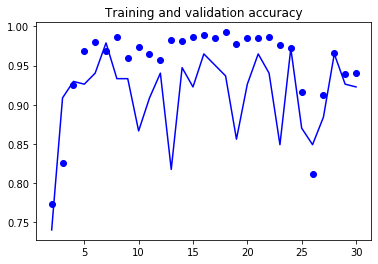

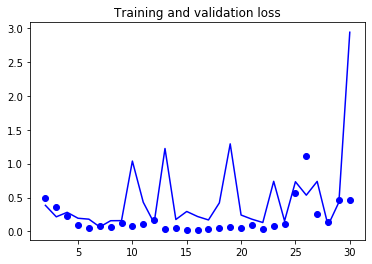

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_n = range(2,len(acc)+1)

plt.plot(epochs_n, acc[1:], 'bo', label='training_accuracy')
plt.plot(epochs_n, val_acc[1:], 'b', label='val_accuracy')
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs_n, loss[1:], 'bo', label='training_loss')
plt.plot(epochs_n, val_loss[1:], 'b', label='val_loss')
plt.title('Training and validation loss')
plt.show()

In [0]:
model.save('./drive/My Drive/lung_separation.h5')

In [0]:
import os
os.getcwd()

'/content'

In [0]:
from tensorflow.keras.models import load_model

In [0]:
model = load_model('lung_separation.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model.predict(x_train[120].reshape(1, 512, 512, 1))

array([[0.]], dtype=float32)

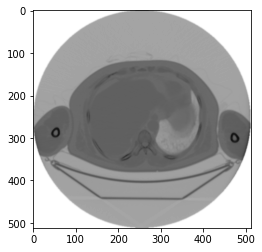

In [0]:
plt.imshow(x_train[120].reshape(512,512), interpolation='bicubic', cmap='Greys')
plt.show()

In [0]:
from tensorflow.keras.preprocessing import image
img = x_train[100]
img = img.reshape(1, 512, 512, 1)

In [0]:
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import cv2

img_ch = cv2.merge([img, img, img])
x = preprocess_input(img_ch)

In [0]:
preds = model.predict(img)

In [0]:
last_conv_layer = model.get_layer('conv2d_12')

In [0]:
preds = model.predict(x_train[120].reshape(1, 512, 512, 1))

In [0]:
preds[0]

array([0.], dtype=float32)

In [0]:
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image

In [0]:
img = x_train[100].reshape(512, 512)
np.shape(img)

(512, 512)

In [0]:
import cv2

img_new = cv2.merge([img, img, img])

In [0]:
np.shape(img_new)

(512, 512, 3)

In [0]:
img_tensor = np.expand_dims(img_new, axis=0)

In [0]:
np.shape(img_tensor)

(1, 512, 512, 3)

In [0]:
img_tensor /=np.max(img_tensor)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


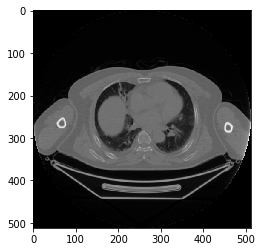

In [0]:
plt.imshow(img_tensor[0])
plt.show()

In [0]:
from tensorflow.keras import models

layer_outputs = [layer.output for layer in model.layers[:8]]

In [0]:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [0]:
img_tensor = img_tensor.reshape(512, 512, 3)

In [0]:
r, g, b = cv2.split(img_tensor)


In [0]:
new_img_tensor = r.reshape(1, 512, 512, 1)

In [0]:
activations = activation_model.predict(new_img_tensor)

In [0]:
first_layer_activation = activations[0]

In [0]:
np.shape(first_layer_activation)

(1, 510, 510, 64)

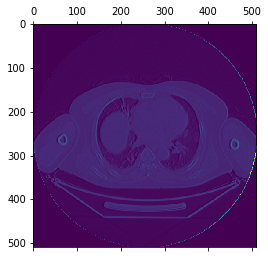

In [0]:
plt.matshow(first_layer_activation[0,:,:,43], cmap='viridis')

In [0]:
second_layer_activation = activations[1]

In [0]:
np.shape(second_layer_activation)

(1, 508, 508, 64)

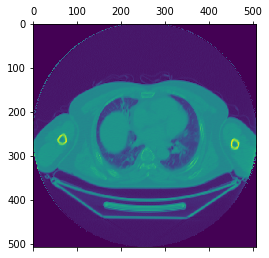

In [0]:
plt.matshow(second_layer_activation[0,:,:,14], cmap='viridis')

In [0]:
len(activations)

8

In [0]:
eighth_layer_activation  = activations[7]

In [0]:
np.shape(eighth_layer_activation)

(1, 121, 121, 256)

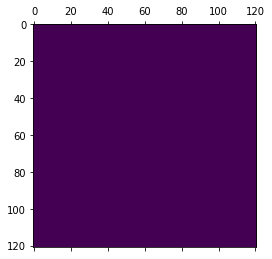

In [0]:
plt.matshow(eighth_layer_activation[0,:,:,100], cmap='viridis')